# 大乐透历史数据处理_蓝球均线算法2022-03-08


In [1]:
# 导入模块
import pandas as pd
import numpy as np
import time
# 取当前日期和时间
date = (time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))
date

'2022-03-27 01:02:13'

In [2]:
# 导入排列组合计算函数
#调用scipy科学计算包中计算排列组合（permutation and combination）的模块
from scipy.special import perm, comb
#调用 itertools库（内置库） 获取排列组合的全部情况数
from itertools import permutations, combinations

In [3]:
# # 举例
# c = comb(12,2)  #组合
# print(c)
# p = perm(12,2) #排列
# print(p)
# list(combinations(['a','b','c'],2))

In [4]:
# 生成所有12个红球的列表数据赋值给a12
a12 = []
for i in range(1,13):
    a12.append(i)
a12

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [5]:
path0 = '大乐透总历史开奖号码表.xlsx'
df = pd.read_excel(path0)
dfa = df.iloc[:,[0,7,8]]
print(dfa.head())
dfa.shape

      期号  L1  L2
0  22032   1   5
1  22031   4   8
2  22030   1   9
3  22029  10  12
4  22028   1   7


(3983, 3)

In [6]:
# 按期号升序排序,DataFrame按指定列排序_升序
dfa1 = dfa.sort_values(by='期号')
# DataFrame重新建索引
dfb = dfa1.reset_index().drop('index', axis = 1)
# 排序后存盘excel文件
dfb.to_excel('大乐透历史数据蓝球数据_升序.xlsx', index=False)


In [7]:
df1 = pd.read_excel('大乐透历史数据蓝球数据_升序.xlsx')
df1['球号'] = 0
df1['次数'] = 0
path = '大乐透历史数据_各个蓝球x期出击次数基本数据表_升序.xlsx'
df1.to_excel(path, index=False)
df1.head()

,期号,L1,L2,球号,次数
0,7001,4,11,0,0
1,7002,5,12,0,0
2,7003,1,6,0,0
3,7004,2,4,0,0
4,7005,2,11,0,0


In [8]:
df1

,期号,L1,L2,球号,次数
0,7001,4,11,0,0
1,7002,5,12,0,0
2,7003,1,6,0,0
3,7004,2,4,0,0
4,7005,2,11,0,0
...,...,...,...,...,...
3978,22028,1,7,0,0
3979,22029,10,12,0,0
3980,22030,1,9,0,0
3981,22031,4,8,0,0


In [9]:
# 读入大乐透历史数据蓝球均线数据_升序.xlsx为df1a
df1a = pd.read_excel(path)
# 生成所有12个蓝球的列表数据赋值给a12
a12 = []
for i in range(1,13):
    a12.append(i)
# # 生成12取2的球号组合
# lx_2 = list(combinations(a12, 2))
# dlx_2 = pd.DataFrame(lx_2)

# 计算df1a对应的每x期的移动出击次数线数据
# 计算移动每个x期中各个蓝球出击次数
print("### 日期时间：", date)
x = 13

for ii in range(len(a12)):
# for ii in range(3): 
    df1a.球号 = a12[ii]
    df1a['次数'] = 0

    for m in range(x,df1a.shape[0]):        
        a = 0
        bb=0
        for i1 in range(x):
            i = m+(i1-x)
            h1 = df1a.loc[i,'L1']
            h2 = df1a.loc[i,'L2']
                        
            if a12[ii]==h1 or a12[ii]==h2:
                a=a+1
            #print(a, bb)
            if a>=1:                
                bb = bb + 1
                a = 0
            else:
                a = 0
                
        #df1a['次数'][i] = bb
        df1a.loc[[i],['次数']] = bb
        #print('球号组合：', df1a['球号组合'][i], '次数：', df1a['次数'][i])
    
    path1 = 'D:\\python_work\\大乐透算法\\大乐透历史数据处理_各个蓝球'+str(x)+'期出击次数算法\\'+str(a12[ii])+'号球移动'+str(x)+'期出击次数数据_MAX='+str(df1a.次数.max())+'.xlsx'
    print('球号:', a12[ii], path1)
    df1a.to_excel(path1, index=False)

    if ii==0:
        df1b = df1a.copy()
    else:
        # 合并连接二个DataFrame        
        df1b = pd.concat([df1b, df1a])

path2 = 'D:\\python_work\\大乐透算法\\大乐透历史数据处理_各个蓝球'+str(x)+'期出击次数算法\\'+'汇总各个蓝球'+'移动'+str(x)+'期出击次数数据_MAX='+str(df1b.次数.max())+'.xlsx'
df1b.to_excel(path2, index=False)
df1b
print('END', '='*80, 'END')



### 日期时间： 2022-03-27 01:02:13
球号: 1 D:\python_work\大乐透算法\大乐透历史数据处理_各个蓝球13期出击次数算法\1号球移动13期出击次数数据_MAX=10.xlsx
球号: 2 D:\python_work\大乐透算法\大乐透历史数据处理_各个蓝球13期出击次数算法\2号球移动13期出击次数数据_MAX=10.xlsx
球号: 3 D:\python_work\大乐透算法\大乐透历史数据处理_各个蓝球13期出击次数算法\3号球移动13期出击次数数据_MAX=10.xlsx
球号: 4 D:\python_work\大乐透算法\大乐透历史数据处理_各个蓝球13期出击次数算法\4号球移动13期出击次数数据_MAX=8.xlsx
球号: 5 D:\python_work\大乐透算法\大乐透历史数据处理_各个蓝球13期出击次数算法\5号球移动13期出击次数数据_MAX=8.xlsx
球号: 6 D:\python_work\大乐透算法\大乐透历史数据处理_各个蓝球13期出击次数算法\6号球移动13期出击次数数据_MAX=9.xlsx
球号: 7 D:\python_work\大乐透算法\大乐透历史数据处理_各个蓝球13期出击次数算法\7号球移动13期出击次数数据_MAX=10.xlsx
球号: 8 D:\python_work\大乐透算法\大乐透历史数据处理_各个蓝球13期出击次数算法\8号球移动13期出击次数数据_MAX=10.xlsx
球号: 9 D:\python_work\大乐透算法\大乐透历史数据处理_各个蓝球13期出击次数算法\9号球移动13期出击次数数据_MAX=10.xlsx
球号: 10 D:\python_work\大乐透算法\大乐透历史数据处理_各个蓝球13期出击次数算法\10号球移动13期出击次数数据_MAX=9.xlsx
球号: 11 D:\python_work\大乐透算法\大乐透历史数据处理_各个蓝球13期出击次数算法\11号球移动13期出击次数数据_MAX=9.xlsx
球号: 12 D:\python_work\大乐透算法\大乐透历史数据处理_各个蓝球13期出击次数算法\12号球移动13期出击次数数据_MAX=8.xlsx
END ==============================

In [10]:
df1b

,期号,L1,L2,球号,次数
0,7001,4,11,1,0
1,7002,5,12,1,0
2,7003,1,6,1,0
3,7004,2,4,1,0
4,7005,2,11,1,0
...,...,...,...,...,...
3978,22028,1,7,12,3
3979,22029,10,12,12,4
3980,22030,1,9,12,4
3981,22031,4,8,12,4


In [11]:
df1b.次数.max()

10

In [12]:
data = df1b.values
column = df1b.columns
column

Index(['期号', 'L1', 'L2', '球号', '次数'], dtype='object')

In [13]:
df1d = pd.DataFrame(data, columns=column,index=[df1b['球号'], df1b['期号']], )
path3 = 'D:\\python_work\\大乐透算法\\大乐透历史数据处理_各个蓝球'+str(x)+'期出击次数算法\\'+'大乐透历史数据各个蓝球'+str(x)+'期移动数据_升序+二层索引.xlsx'
df1d.to_excel(path3, index=True)
df1d.shape


(47796, 5)

In [14]:
df1d.index.names

FrozenList(['球号', '期号'])

In [15]:
c9 = list(df1b[df1b.次数>=df1b.次数.max()].球号)
print('df1b.次数.max()=', df1b.次数.max())
c9a = []
c9a.append(c9[0])
for i in c9:
    if i in c9a:
        pass
    else:
        c9a.append(i)
print(len(c9a),c9a)


df1b.次数.max()= 10
6 [1, 2, 3, 7, 8, 9]


In [16]:
c9 = list(df1b[df1b.次数>=df1b.次数.max()-1].球号)
print('df1b.次数.max()-1=', df1b.次数.max()-1)
c9a = []
c9a.append(c9[0])
for i in c9:
    if i in c9a:
        pass
    else:
        c9a.append(i)
print(len(c9a),c9a)


df1b.次数.max()-1= 9
9 [1, 2, 3, 6, 7, 8, 9, 10, 11]


In [17]:
x = 13
path2 = 'D:\\python_work\\大乐透算法\\大乐透历史数据处理_各个蓝球'+str(x)+'期出击次数算法\\汇总各个蓝球移动13期出击次数数据_MAX=10.xlsx'
df1b = pd.read_excel(path2)
df1b.head()

,期号,L1,L2,球号,次数
0,7001,4,11,1,0
1,7002,5,12,1,0
2,7003,1,6,1,0
3,7004,2,4,1,0
4,7005,2,11,1,0


In [18]:
df1b.shape

(47796, 5)

In [19]:
# 计算21年100期后最大出击次数-1的球cb
print('# 计算21年100期后最大出击次数-1的球cb')
df2 = df1b[df1b.期号>=21100]
print('df2.次数.max()-1:', df2.次数.max()-1)
c9 = list(df2[df2.次数>=df2.次数.max()-1].球号)
cb = []
cb.append(c9[0])
for i in c9:
    if i in cb:
        pass
    else:
        cb.append(i)
print(len(cb),cb)


# 计算21年100期前最大出击次数-1的球cc
df2b = df1b[df1b.期号>=21000]
df2a = df2b[df2b.期号<21100]
print('# 计算21年100期前最大出击次数-1的球cc')
print('df2a.次数.max()-1:', df2a.次数.max()-1)
c9 = list(df2a[df2a.次数>=df2a.次数.max()-1].球号)
cc = []
cc.append(c9[0])
for i in c9:
    if i in cc:
        pass
    else:
        cc.append(i)
print(len(cc),cc)


# 计算cc球组中去除cb后的球赋值cd
cd = []
for i in cc:
    if i in cb:
        pass
    else:
        cd.append(i)
print('# 计算cc球组中去除cb后的球赋值cd')
print(len(cd),cd)

# print('球组中在21年100期后出击次数为4/5次的球赋值c91a/c92a')
# c91 = list(df2[df2.次数==4].球号)
# c92 = list(df2[df2.次数==5].球号)
# # c91去重存到c91a
# c91a = []
# c91a.append(c91[0])
# for i in c91:
#     if i in c91a:
#         pass
#     else:
#         c91a.append(i)
# print('c91a:', len(c91a), c91a)
# # c92去重存到c92a
# c92a = []
# # c92a.append(c92[0])
# for i in c92:
#     if i in c92a:
#         pass
#     else:
#         c92a.append(i)
# print('c92a:', len(c92a), c92a)
# # c91a中去除c92的球存到c9
# c9 = []
# for i in c91a:
#     if i in c92a:
#         pass
#     else:
#         c9.append(i)
# print('c91a中去除c92的球存到c9')
# print('c9:', len(c9), c9)


# # 计算cd球组中在21年100期后出击次数为4次的球赋值ce
# ce = []
# for i in c9:
#     if i in cd:
#         ce.append(i)
#     else:
#         pass
# print('# 计算cd球组中在21年100期后出击次数为4次的球赋值ce')
# print('ce:', len(ce), ce)


# 计算21年100期后最大出击次数-1的球cb
df2.次数.max()-1: 6
3 [5, 9, 11]
# 计算21年100期前最大出击次数-1的球cc
df2a.次数.max()-1: 6
4 [4, 7, 8, 10]
# 计算cc球组中去除cb后的球赋值cd
4 [4, 7, 8, 10]


In [20]:
# 计算21年300期后最大出击次数-1的球cb
print('# 计算21年300期后最大出击次数-1的球cb')
df2 = df1b[df1b.期号>=21300]
print('df2.次数.max()-1:', df2.次数.max()-1)
c9 = list(df2[df2.次数>=df2.次数.max()-1].球号)
cb = []
cb.append(c9[0])
for i in c9:
    if i in cb:
        pass
    else:
        cb.append(i)
print(len(cb),cb)


# 计算21年300期前最大出击次数-1的球cc
df2b = df1b[df1b.期号>=21000]
df2a = df2b[df2b.期号<21300]
print('# 计算21年300期前最大出击次数-1的球cc')
print('df2a.次数.max()-1:', df2a.次数.max()-1)
c9 = list(df2a[df2a.次数>=df2a.次数.max()-1].球号)
cc = []
cc.append(c9[0])
for i in c9:
    if i in cc:
        pass
    else:
        cc.append(i)
print(len(cc),cc)


# 计算cc球组中去除cb后的球赋值cd
cd = []
for i in cc:
    if i in cb:
        pass
    else:
        cd.append(i)
print('# 计算cc球组中去除cb后的球赋值cd')
print(len(cd),cd)

# print('球组中在21年300期后出击次数为3/4次的球赋值c91a/c92a')
# c91 = list(df2[df2.次数==3].球号)
# c92 = list(df2[df2.次数==4].球号)
# # c91去重存到c91a
# c91a = []
# c91a.append(c91[0])
# for i in c91:
#     if i in c91a:
#         pass
#     else:
#         c91a.append(i)
# print('c91a:', len(c91a), c91a)
# # c92去重存到c92a
# c92a = []
# # c92a.append(c92[0])
# for i in c92:
#     if i in c92a:
#         pass
#     else:
#         c92a.append(i)
# print('c92a:', len(c92a), c92a)
# # c91a中去除c92的球存到c9
# c9 = []
# for i in c91a:
#     if i in c92a:
#         pass
#     else:
#         c9.append(i)
# print('c91a中去除c92的球存到c9')
# print('c9:', len(c9), c9)


# # 计算cd球组中在21年300期后出击次数为3次的球赋值ce
# ce = []
# for i in c9:
#     if i in cd:
#         ce.append(i)
#     else:
#         pass
# print('# 计算cd球组中在21年300期后出击次数为3次的球赋值ce')
# print('ce:', len(ce), ce)


# 计算21年300期后最大出击次数-1的球cb
df2.次数.max()-1: 4
8 [1, 4, 5, 6, 7, 9, 11, 12]
# 计算21年300期前最大出击次数-1的球cc
df2a.次数.max()-1: 6
7 [4, 5, 7, 8, 9, 10, 11]
# 计算cc球组中去除cb后的球赋值cd
2 [8, 10]


## 计算cc球组中去除cb后的球赋值cd
## 2 [8, 10]

## 画图

In [21]:
# 导入需要的函数
from bokeh.plotting import figure, output_notebook, show
import seaborn as sns
from matplotlib import pyplot as plt


In [22]:
df2b.head()

,期号,L1,L2,球号,次数
3801,21001,8,9,1,2
3802,21002,9,11,1,2
3803,21003,4,10,1,2
3804,21004,2,8,1,1
3805,21005,3,5,1,1


In [23]:
df2b.shape

(2184, 5)

In [24]:
qs = -50

8号球每13期移动出击次数线


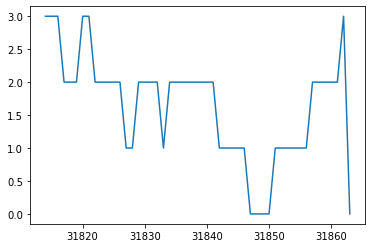

10号球每13期移动出击次数线


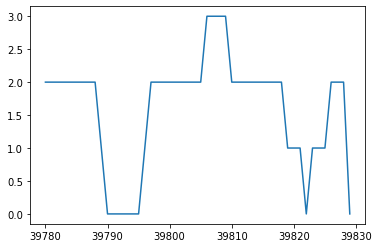

In [25]:
# 循环遍历cd中各球画出每13期移动出击次数线
for i in range(len(cd)):
    # 计算x/y的数据
    y1 = df2b[df2b.球号==cd[i]].次数[qs:]
    x1 = df2b[df2b.球号==cd[i]].期号[qs:]
    # 创建画布 p，设置 x_axis_type='datetime'
    # plt.figure(figsize=(20,6),dpi=600)
    plt.figure()
    print(str(cd[i])+'号球每13期移动出击次数线')
    plt.plot(x1.index, y1)
    plt.title=str(cd[i])+'号球每13期移动出击次数线'
    plt.show()
